In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.DataFrame(
    {
        "Study Time": [1,2,3,4,5,6,7,8,9,10],
        "Marks" : [3,4,5,6,6,8,8,9,9,10]
    }
)

df.to_csv('student_performance.csv', index = False)

In [89]:
df = pd.read_csv('student_performance.csv')
df

,Study Time,Marks
0,1,3
1,2,4
2,3,5
3,4,6
4,5,6
5,6,8
6,7,8
7,8,9
8,9,9
9,10,10


In [90]:
x = df['Study Time']
y = df['Marks']
n = len(df.index)
print(f"Size of dataframe : {len(df.index)}")

# Linear Regression using intuitue method
x_mean = np.mean(x) 
y_mean = np.mean(y)
df['x-x_mean'] = x - x_mean
df['y-y_mean'] = y - y_mean
df['x-x_mean_squared'] = df['x-x_mean']**2
df

Size of dataframe : 10


,Study Time,Marks,x-x_mean,y-y_mean,x-x_mean_squared
0,1,3,-4.5,-3.8,20.25
1,2,4,-3.5,-2.8,12.25
2,3,5,-2.5,-1.8,6.25
3,4,6,-1.5,-0.8,2.25
4,5,6,-0.5,-0.8,0.25
5,6,8,0.5,1.2,0.25
6,7,8,1.5,1.2,2.25
7,8,9,2.5,2.2,6.25
8,9,9,3.5,2.2,12.25
9,10,10,4.5,3.2,20.25


In [91]:
B1 = np.sum(df['x-x_mean']*df['y-y_mean'])/np.sum(df['x-x_mean_squared'])
B0 = y_mean - B1*x_mean
print(f"Slope B1 : {B1}")
print(f"intercept B0 : {B0}")

Slope B1 : 0.7636363636363636
intercept B0 : 2.6000000000000005


In [92]:
df['predicted'] = B0 + x*B1
df['error'] = df['predicted'] - y
df

,Study Time,Marks,x-x_mean,y-y_mean,x-x_mean_squared,predicted,error
0,1,3,-4.5,-3.8,20.25,3.363636,0.363636
1,2,4,-3.5,-2.8,12.25,4.127273,0.127273
2,3,5,-2.5,-1.8,6.25,4.890909,-0.109091
3,4,6,-1.5,-0.8,2.25,5.654545,-0.345455
4,5,6,-0.5,-0.8,0.25,6.418182,0.418182
5,6,8,0.5,1.2,0.25,7.181818,-0.818182
6,7,8,1.5,1.2,2.25,7.945455,-0.054545
7,8,9,2.5,2.2,6.25,8.709091,-0.290909
8,9,9,3.5,2.2,12.25,9.472727,0.472727
9,10,10,4.5,3.2,20.25,10.236364,0.236364


In [93]:
# ROOT MEAN SQUARED EEROR
RMSE = ((1/n)*(np.sum(df['error']**2)))**(1/2)
print(RMSE)

0.38612291966536927


In [94]:
# Matrix Method
x_mat = np.array([[n, np.sum(x)],[np.sum(x), np.sum(x**2)]])
print(x_mat)
y_mat = np.array([[np.sum(y)],[np.sum(x*y)]])
print(y_mat)

results = np.linalg.inv(x_mat) @ y_mat
print(results)

[[ 10  55]
 [ 55 385]]
[[ 68]
 [437]]
[[2.6       ]
 [0.76363636]]


In [95]:
# USING SKLEARN
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
model.fit(x,y)

LinearRegression()

In [97]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x)
RMSE = mean_squared_error(y_true = y, y_pred = y_pred, squared = False)
print(RMSE)

0.38612291966536927


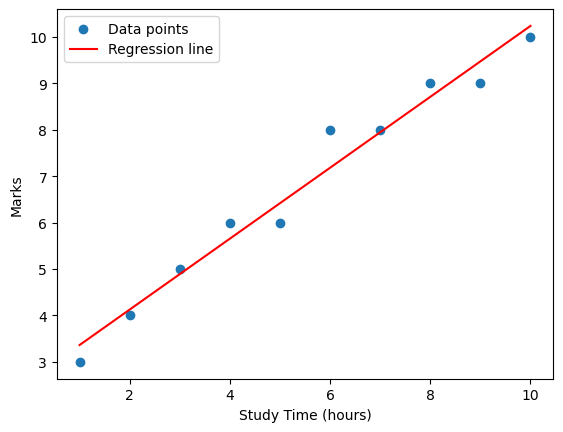

In [100]:
plt.scatter(x,y, label = 'Data points')
plt.plot(x,y_pred, color = 'red',label = 'Regression line')
plt.xlabel('Study Time (hours)')
plt.ylabel('Marks')
plt.legend()
plt.show()